In [2]:
import pandas as pd

input_path = 'dataset/cleaned_data_export.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((2736, 79), (2736,))

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.30, random_state=42)

for max_leaves in range(300,500):
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("Max leaves: {:d} Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(max_leaves, train_acc,test_acc) )

#model_decision_boundary(dt, X_test, y_test)

Max leaves: 300 Train Accuracy: 0.923 - Test Accuracy: 0.525
Max leaves: 301 Train Accuracy: 0.925 - Test Accuracy: 0.533
Max leaves: 302 Train Accuracy: 0.924 - Test Accuracy: 0.519
Max leaves: 303 Train Accuracy: 0.926 - Test Accuracy: 0.523
Max leaves: 304 Train Accuracy: 0.927 - Test Accuracy: 0.537
Max leaves: 305 Train Accuracy: 0.928 - Test Accuracy: 0.524
Max leaves: 306 Train Accuracy: 0.927 - Test Accuracy: 0.529
Max leaves: 307 Train Accuracy: 0.927 - Test Accuracy: 0.519
Max leaves: 308 Train Accuracy: 0.929 - Test Accuracy: 0.524
Max leaves: 309 Train Accuracy: 0.930 - Test Accuracy: 0.530
Max leaves: 310 Train Accuracy: 0.930 - Test Accuracy: 0.533
Max leaves: 311 Train Accuracy: 0.930 - Test Accuracy: 0.524
Max leaves: 312 Train Accuracy: 0.932 - Test Accuracy: 0.532
Max leaves: 313 Train Accuracy: 0.932 - Test Accuracy: 0.526
Max leaves: 314 Train Accuracy: 0.933 - Test Accuracy: 0.531
Max leaves: 315 Train Accuracy: 0.934 - Test Accuracy: 0.519
Max leaves: 316 Train Ac

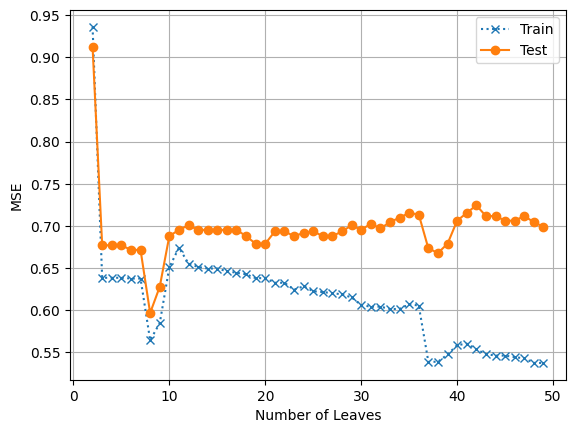

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.20, random_state=42)

errors = []

for max_leaves in range(2,50):
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();

Cross-validation

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Genera un dataset di esempio

# Loop per diversi valori di max_leaf_nodes
for max_leaves in range(2, 20):
    # Crea il classificatore
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves, random_state=42)
    
    # Esegui la cross-validation (usa 5-fold per default)
    scores = cross_val_score(dt, train, y, cv=13, scoring='accuracy')
    
    # Calcola l'accuratezza media e la deviazione standard
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    print(f"Max leaves: {max_leaves} - CV Accuracy: {mean_score:.3f} ± {std_score:.3f}")


Max leaves: 2 - CV Accuracy: 0.583 ± 0.002
Max leaves: 3 - CV Accuracy: 0.568 ± 0.023
Max leaves: 4 - CV Accuracy: 0.590 ± 0.026
Max leaves: 5 - CV Accuracy: 0.600 ± 0.021
Max leaves: 6 - CV Accuracy: 0.596 ± 0.022
Max leaves: 7 - CV Accuracy: 0.595 ± 0.024
Max leaves: 8 - CV Accuracy: 0.596 ± 0.027
Max leaves: 9 - CV Accuracy: 0.596 ± 0.029
Max leaves: 10 - CV Accuracy: 0.598 ± 0.027
Max leaves: 11 - CV Accuracy: 0.595 ± 0.031
Max leaves: 12 - CV Accuracy: 0.596 ± 0.030
Max leaves: 13 - CV Accuracy: 0.597 ± 0.030
Max leaves: 14 - CV Accuracy: 0.596 ± 0.027
Max leaves: 15 - CV Accuracy: 0.599 ± 0.027
Max leaves: 16 - CV Accuracy: 0.598 ± 0.025
Max leaves: 17 - CV Accuracy: 0.600 ± 0.024
Max leaves: 18 - CV Accuracy: 0.598 ± 0.025
Max leaves: 19 - CV Accuracy: 0.596 ± 0.025
